# Import the necessary libraries

In [39]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report
from keras.applications import resnet_v2
import keras 
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Colab Files/data.zip"

with ZipFile(file_name,'r') as zip:
    zip.extractall()
    print('Done')

Done


# Plot the sample images for all the classes 
# Plot the distribution of images across the classes

In [4]:
picture_size = 48
folder_path = '/content/data/'

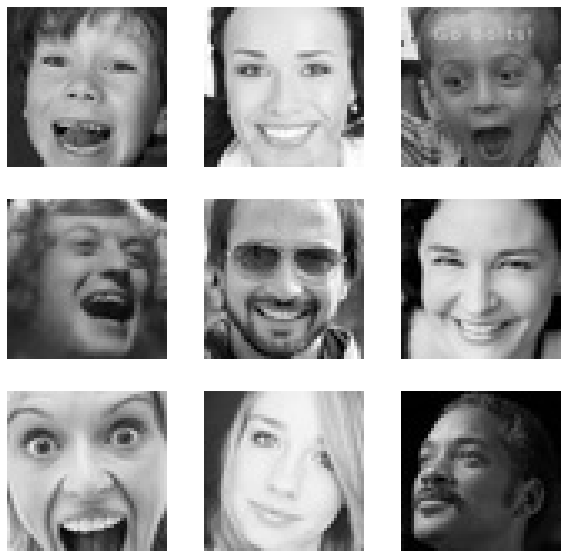

In [5]:
expression = 'happy'

plt.figure(figsize= (10,10))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+ os.listdir(folder_path + "train/" + expression)[i], 
                   target_size=(picture_size, picture_size))
    plt.imshow(img) 
    plt.axis('off')
plt.show()

In [6]:
train_dir = '/content/data/train'
test_dir = '/content/data/test'

train_angry_dir = '/content/data/train/angry'
train_disgust_dir = '/content/data/train/disgust'
train_fear_dir = '/content/data/train/fear'
train_happy_dir = '/content/data/train/happy' 
train_neutral_dir = '/content/data/train/neutral'
train_sad_dir = '/content/data/train/sad'
train_surprise_dir = '/content/data/train/surprise'

test_angry_dir = '/content/data/test/angry'
test_disgust_dir = '/content/data/test/disgust'
test_fear_dir = '/content/data/test/fear'
test_happy_dir = '/content/data/test/happy'
test_neutral_dir = '/content/data/test/neutral'
test_sad_dir = '/content/data/test/sad'
test_surprise_dir = '/content/data/test/surprise'

dir_list = [train_angry_dir,train_disgust_dir,train_fear_dir,train_happy_dir,train_neutral_dir,train_sad_dir,
            train_surprise_dir,test_angry_dir,test_disgust_dir,test_fear_dir,test_happy_dir,test_neutral_dir,
           test_sad_dir,test_surprise_dir]

for d in dir_list:
    print(d,len(os.listdir(d)))

/content/data/train/angry 3992
/content/data/train/disgust 436
/content/data/train/fear 4103
/content/data/train/happy 7164
/content/data/train/neutral 4982
/content/data/train/sad 4938
/content/data/train/surprise 3205
/content/data/test/angry 960
/content/data/test/disgust 111
/content/data/test/fear 1018
/content/data/test/happy 1825
/content/data/test/neutral 1216
/content/data/test/sad 1139
/content/data/test/surprise 797


# Build a data augmentation for train data to create new data with translation, rescale and flip, and rotation transformations. Rescale the image at 48x48

# Build a data augmentation for test data to create new data and rescale the image at 48x48

# Read images directly from the train folder and test folder using the appropriate function

In [7]:
# image generator

train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=64,
                                                   class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

validation_generator = validation_datagen.flow_from_directory(test_dir,
                                                             target_size=(150,150),
                                                             batch_size=62,
                                                             class_mode='categorical')

Found 28820 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# 1. CNN Architecture:

- Add convolutional layers, max pool layers, dropout layers, batch normalization layers  

- Use Relu as activation functions

- Take loss function as categorical cross-entropy

- Take Adam as an optimizer

- Use early-stop with two patients and monitor for validation loss

- Try with ten number epochs

- Train the model using the generator and test the accuracy of the test data at every epoch

- Plot the training and validation accuracy, and the loss

- Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good

In [8]:
model_adam = Sequential()

# 1st CNN layer
model_adam.add(Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)))
model_adam.add(BatchNormalization())
model_adam.add(MaxPooling2D(2,2))
model_adam.add(Dropout(0.25))

# 2nd CNN Layer
model_adam.add(Conv2D(32,(3,3),activation='relu'))
model_adam.add(BatchNormalization())
model_adam.add(MaxPooling2D(2,2))
model_adam.add(Dropout(0.25))

# 3rd CNN layer
model_adam.add(Conv2D(64,(3,3),activation='relu'))
model_adam.add(BatchNormalization())
model_adam.add(MaxPooling2D(2,2))
model_adam.add(Dropout(0.25))

# 4th CNN Layer
model_adam.add(Conv2D(64,(3,3),activation='relu'))
model_adam.add(BatchNormalization())
model_adam.add(MaxPooling2D(2,2))
model_adam.add(Dropout(0.25))

model_adam.add(Flatten())

# Fully connected layer
model_adam.add(Dense(512,activation='relu'))

model_adam.add(Dense(7,activation='softmax'))

In [9]:
model_adam.compile(optimizer=keras.optimizers.adam_v2.Adam(learning_rate=0.001),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [10]:
model_adam.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 32)       1

In [11]:
early_stopping = EarlyStopping(patience=2,monitor='val_loss',restore_best_weights=True)

In [12]:
# Fit the model
history_adam = model_adam.fit(train_generator,epochs=10,batch_size=512,verbose=1,validation_data=validation_generator,
                    callbacks=early_stopping)

Epoch 1/10
451/451 [==============================] - 155s 322ms/step - loss: 1.9825 - accuracy: 0.2357 - val_loss: 1.8593 - val_accuracy: 0.2632
Epoch 2/10
451/451 [==============================] - 143s 317ms/step - loss: 1.7789 - accuracy: 0.2579 - val_loss: 1.7534 - val_accuracy: 0.2714
Epoch 3/10
451/451 [==============================] - 143s 317ms/step - loss: 1.7552 - accuracy: 0.2730 - val_loss: 2.0191 - val_accuracy: 0.2829
Epoch 4/10
451/451 [==============================] - 144s 318ms/step - loss: 1.7077 - accuracy: 0.3068 - val_loss: 1.7208 - val_accuracy: 0.3006
Epoch 5/10
451/451 [==============================] - 143s 318ms/step - loss: 1.6553 - accuracy: 0.3347 - val_loss: 1.5006 - val_accuracy: 0.4181
Epoch 6/10
451/451 [==============================] - 142s 314ms/step - loss: 1.6104 - accuracy: 0.3633 - val_loss: 1.6171 - val_accuracy: 0.3913
Epoch 7/10
451/451 [==============================] - 142s 315ms/step - loss: 1.5699 - accuracy: 0.3817 - val_loss: 1.5449 -

In [13]:
# Evaluate the model
test_loss, test_acc = model_adam.evaluate(validation_generator,verbose=1)

print('Model Accuracy',test_acc)
print('Model Loss',test_loss)

114/114 [==============================] - 5s 41ms/step - loss: 1.5006 - accuracy: 0.4181
Model Accuracy 0.418058305978775
Model Loss 1.5005847215652466


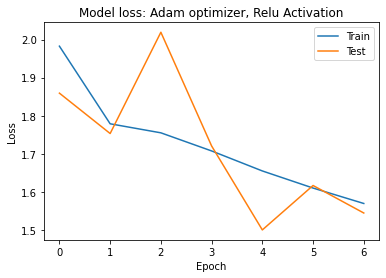

In [14]:
# Plot the loss function for the model
plt.plot(history_adam.history['loss'], label='train')
plt.plot(history_adam.history['val_loss'], label='test')

plt.title('Model loss: Adam optimizer, Relu Activation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

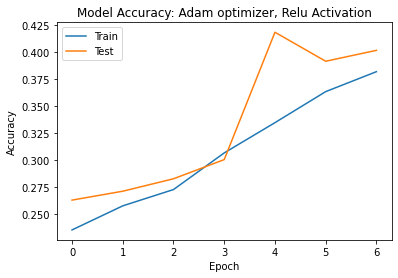

In [15]:
# Plot the accuracy function for the model
plt.plot(history_adam.history['accuracy'], label='train')
plt.plot(history_adam.history['val_accuracy'], label='test')

plt.title('Model Accuracy: Adam optimizer, Relu Activation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'],loc='best')
plt.show()

# Customized CNN Architecture:

- Add convolutional layers, max pool layers, dropout layers, batch normalization layers on the top of the first model architecture to improve the accuracy

- Change the batch size activation function and optimizer as rmsprop and observe if the accuracy increases

- Take the loss function as categorical cross-entropy

- Use early stopping with the patience of two epochs and monitoring of validation loss

- Try with ten number epochs

- Train the model using the generator and test the accuracy of the test data at every epoch

- Plot the training and validation accuracy, and the loss

- Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good

In [16]:
model_rmsprop = Sequential()

# 1st CNN layer
model_rmsprop.add(Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)))
model_rmsprop.add(BatchNormalization())
model_rmsprop.add(MaxPooling2D(2,2))
model_rmsprop.add(Dropout(0.25))

# 2nd CNN Layer
model_rmsprop.add(Conv2D(32,(3,3),activation='relu'))
model_rmsprop.add(BatchNormalization())
model_rmsprop.add(MaxPooling2D(2,2))
model_rmsprop.add(Dropout(0.25))

# 3rd CNN layer
model_rmsprop.add(Conv2D(64,(3,3),activation='relu'))
model_rmsprop.add(BatchNormalization())
model_rmsprop.add(MaxPooling2D(2,2))
model_rmsprop.add(Dropout(0.25))

model_rmsprop.add(Flatten())

# Fully connected layer
model_rmsprop.add(Dense(512,activation='relu'))

model_rmsprop.add(Dense(7,activation='softmax'))

In [17]:
model_rmsprop.compile(optimizer=keras.optimizers.rmsprop_v2.RMSProp(learning_rate=0.0001),
                      loss=keras.losses.categorical_crossentropy,
                      metrics=['accuracy'])

In [18]:
model_rmsprop.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 batch_normalization_4 (Batc  (None, 148, 148, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 74, 74, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 batch_normalization_5 (Batc  (None, 72, 72, 32)      

In [19]:
early_stopping = EarlyStopping(patience=2,monitor='val_loss',restore_best_weights=True)

In [20]:
# Fit the model
history_rmsprop = model_rmsprop.fit(train_generator,epochs=10,batch_size=512,verbose=1,validation_data=validation_generator,
                                    callbacks=early_stopping)

Epoch 1/10
451/451 [==============================] - 145s 318ms/step - loss: 1.9207 - accuracy: 0.2339 - val_loss: 3.0168 - val_accuracy: 0.2349
Epoch 2/10
451/451 [==============================] - 144s 320ms/step - loss: 1.7985 - accuracy: 0.2535 - val_loss: 1.9633 - val_accuracy: 0.2772
Epoch 3/10
451/451 [==============================] - 142s 314ms/step - loss: 1.7827 - accuracy: 0.2635 - val_loss: 2.0487 - val_accuracy: 0.2880
Epoch 4/10
451/451 [==============================] - 145s 321ms/step - loss: 1.7697 - accuracy: 0.2734 - val_loss: 1.9202 - val_accuracy: 0.3147
Epoch 5/10
451/451 [==============================] - 143s 317ms/step - loss: 1.7615 - accuracy: 0.2812 - val_loss: 2.2899 - val_accuracy: 0.3135
Epoch 6/10
451/451 [==============================] - 143s 316ms/step - loss: 1.7502 - accuracy: 0.2865 - val_loss: 3.3217 - val_accuracy: 0.2833


In [21]:
# Evaluate the model
test_loss, test_acc = model_rmsprop.evaluate(validation_generator,verbose=1)

print('Model Accuracy',test_acc)
print('Model Loss',test_loss)

114/114 [==============================] - 5s 40ms/step - loss: 1.9202 - accuracy: 0.3147
Model Accuracy 0.3147466778755188
Model Loss 1.9201639890670776


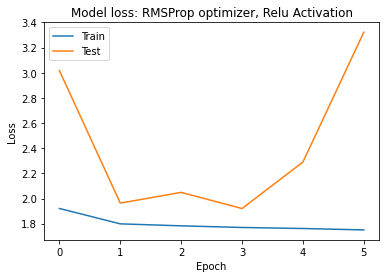

In [22]:
# Plot the loss function for the model
plt.plot(history_rmsprop.history['loss'], label='train')
plt.plot(history_rmsprop.history['val_loss'], label='test')

plt.title('Model loss: RMSProp optimizer, Relu Activation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

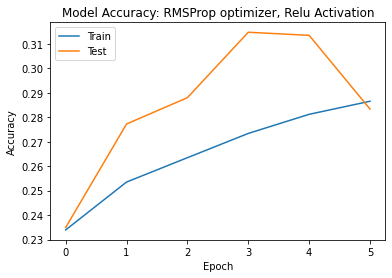

In [23]:
# Plot the accuracy function for the model
plt.plot(history_rmsprop.history['accuracy'], label='train')
plt.plot(history_rmsprop.history['val_accuracy'], label='test')

plt.title('Model Accuracy: RMSProp optimizer, Relu Activation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'],loc='best')
plt.show()

# Transfer Learning:
- Prepare the data for the transfer learning algorithm

- Freeze the top layers of the pre-trained model

- Add a dense layer at the end of the pre-trained model followed by a dropout layer

- Add the final output layer with the SoftMax activation function

- Take the loss function as categorical cross-entropy

- Take Adam as an optimizer

- Use early stopping with the patience of two epochs and monitor the validation loss which is set as minimum mode

- Try with fifteen number epochs

- Train the model using the generator and test the accuracy of the test data at every epoch

- Plot the training and validation accuracy, and the loss

- Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good

In [26]:
NUM_CLASSES = 7

model_tf = Sequential()
model_tf.add(resnet_v2.ResNet50V2(include_top=False,pooling='max',weights='imagenet'))
model_tf.add(Dense(NUM_CLASSES,activation='softmax'))

model_tf.layers[0].trainable = False

94668760/94668760 [==============================] - 3s 0us/step


In [27]:
# Compile the transfer learning model
adam = keras.optimizers.adam_v2.Adam(learning_rate=1e-3,decay=1e-6)

model_tf.compile(optimizer=adam,
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

model_tf.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dense_4 (Dense)             (None, 7)                 14343     
                                                                 
Total params: 23,579,143
Trainable params: 14,343
Non-trainable params: 23,564,800
_________________________________________________________________


In [28]:
early_stopping = EarlyStopping(patience=2,monitor='val_loss',restore_best_weights=True)

In [29]:
history_tf = model_tf.fit(train_generator,
                    epochs=15,
                    callbacks=early_stopping,
                    batch_size=512,
                    verbose=1,
                   validation_data=validation_generator)

Epoch 1/15
451/451 [==============================] - 166s 359ms/step - loss: 3.3520 - accuracy: 0.2992 - val_loss: 2.5123 - val_accuracy: 0.3613
Epoch 2/15
451/451 [==============================] - 159s 353ms/step - loss: 2.3808 - accuracy: 0.3475 - val_loss: 2.3007 - val_accuracy: 0.3956
Epoch 3/15
451/451 [==============================] - 155s 344ms/step - loss: 2.0713 - accuracy: 0.3700 - val_loss: 1.7990 - val_accuracy: 0.4042
Epoch 4/15
451/451 [==============================] - 156s 346ms/step - loss: 1.9403 - accuracy: 0.3825 - val_loss: 1.6937 - val_accuracy: 0.4179
Epoch 5/15
451/451 [==============================] - 156s 345ms/step - loss: 1.8904 - accuracy: 0.3829 - val_loss: 1.7142 - val_accuracy: 0.4563
Epoch 6/15
451/451 [==============================] - 156s 346ms/step - loss: 1.8997 - accuracy: 0.3828 - val_loss: 1.5949 - val_accuracy: 0.4547
Epoch 7/15
451/451 [==============================] - 154s 342ms/step - loss: 1.8693 - accuracy: 0.3874 - val_loss: 1.6574 -

In [30]:
# Evaluate the model
test_loss, test_acc = model_tf.evaluate(validation_generator,verbose=1)

print('Model Accuracy',test_acc)
print('Model Loss',test_loss)

114/114 [==============================] - 11s 92ms/step - loss: 1.5949 - accuracy: 0.4547
Model Accuracy 0.45471271872520447
Model Loss 1.5948704481124878


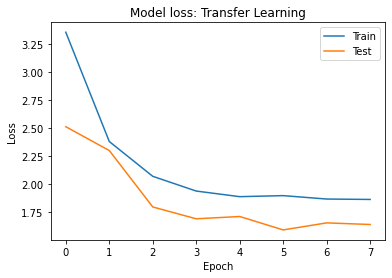

In [60]:
# Plot the loss function for the model
plt.plot(history_tf.history['loss'], label='train')
plt.plot(history_tf.history['val_loss'], label='test')

plt.title('Model loss: Transfer Learning')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

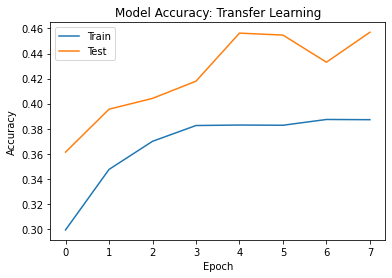

In [61]:
# Plot the accuracy function for the model
plt.plot(history_tf.history['accuracy'], label='train')
plt.plot(history_tf.history['val_accuracy'], label='test')

plt.title('Model Accuracy: Transfer Learning')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'],loc='best')
plt.show()

# Combined Loss Plot

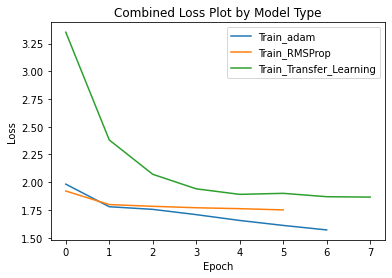

In [57]:
# Plot all loss results on one graph

plt.plot (history_adam.history['loss'])
plt.plot (history_rmsprop.history['loss'])
plt.plot (history_tf.history['loss'])

plt.title('Combined Loss Plot by Model Type')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train_adam', 'Train_RMSProp', 'Train_Transfer_Learning'],
            loc='best')

plt.show()

# Combine Accuracy Plot

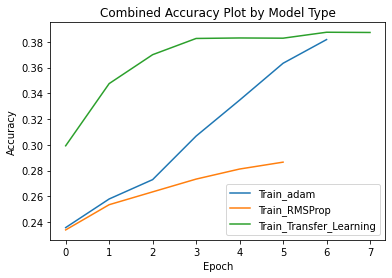

In [56]:
# Plot all accuracy results on one graph
import matplotlib.pyplot as plt

plt.plot(history_adam.history['accuracy'])
plt.plot(history_rmsprop.history['accuracy'])
plt.plot(history_tf.history['accuracy'])

plt.title('Combined Accuracy Plot by Model Type')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_adam', 'Train_RMSProp', 'Train_Transfer_Learning'],
            loc='best')
plt.show()

# Compare all the models on the basis of accuracy, precision, recall, and f1-score

114/114 [==============================] - 4s 38ms/step
Confusion Matrix
[[ 33   0  79 344 157 208 139]
 [  2   0   6  37  18  32  16]
 [ 39   0  71 349 184 239 136]
 [ 77   0 130 632 287 406 293]
 [ 51   0  99 428 188 261 189]
 [ 36   0  98 400 183 266 156]
 [ 29   0  69 289 120 176 114]]


Text(69.0, 0.5, 'Truth')

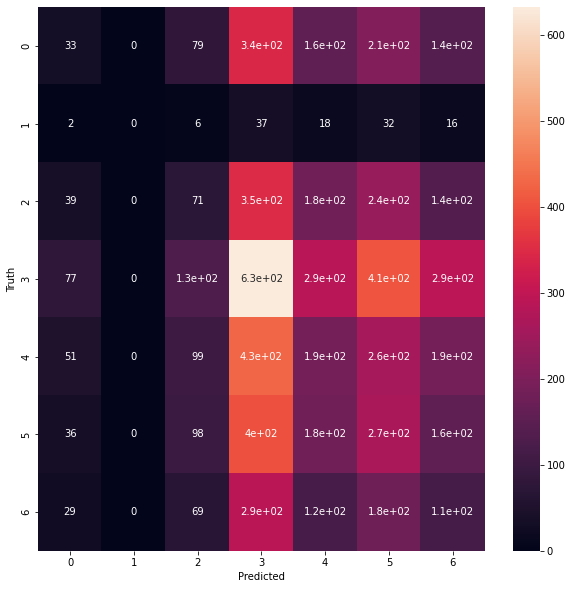

In [50]:
y_pred = model_adam.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
print(classification_report(validation_generator.classes,y_pred))

              precision    recall  f1-score   support

           0       0.12      0.03      0.05       960
           1       0.00      0.00      0.00       111
           2       0.13      0.07      0.09      1018
           3       0.25      0.35      0.29      1825
           4       0.17      0.15      0.16      1216
           5       0.17      0.23      0.20      1139
           6       0.11      0.14      0.12       797

    accuracy                           0.18      7066
   macro avg       0.14      0.14      0.13      7066
weighted avg       0.17      0.18      0.17      7066



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


114/114 [==============================] - 5s 40ms/step
Confusion Matrix
[[  27    0   19  556  100   54  204]
 [   6    0    3   60   11    4   27]
 [  32    0   20  586   85   52  243]
 [  56    0   31 1036  170  101  431]
 [  33    0   17  699  140   69  258]
 [  28    0   22  625  122   78  264]
 [  24    0   14  465   81   50  163]]


Text(69.0, 0.5, 'Truth')

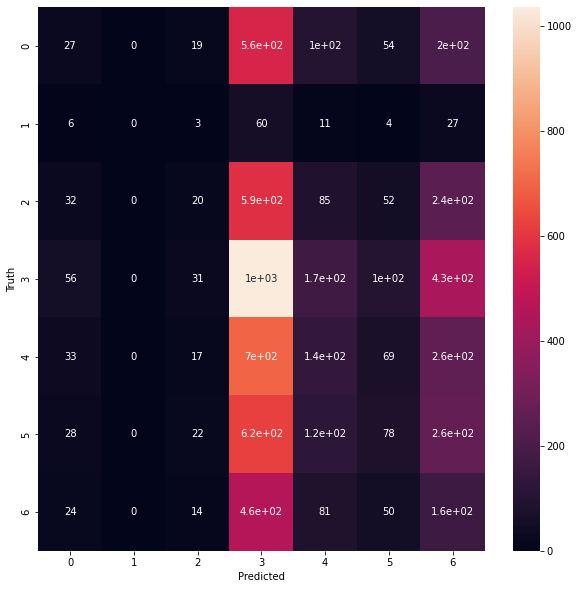

In [52]:
y_pred = model_rmsprop.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
print(classification_report(validation_generator.classes,y_pred))

              precision    recall  f1-score   support

           0       0.13      0.03      0.05       960
           1       0.00      0.00      0.00       111
           2       0.16      0.02      0.03      1018
           3       0.26      0.57      0.35      1825
           4       0.20      0.12      0.15      1216
           5       0.19      0.07      0.10      1139
           6       0.10      0.20      0.14       797

    accuracy                           0.21      7066
   macro avg       0.15      0.14      0.12      7066
weighted avg       0.18      0.21      0.16      7066



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


114/114 [==============================] - 11s 94ms/step
Confusion Matrix
[[ 60   8  77 301 319  85 110]
 [  7   0   5  26  49  11  13]
 [ 66  14  67 323 314  96 138]
 [121  15 145 568 595 172 209]
 [ 74   3  82 372 398 116 171]
 [ 57   5  86 353 390  92 156]
 [ 51   7  66 250 263  70  90]]


Text(69.0, 0.5, 'Truth')

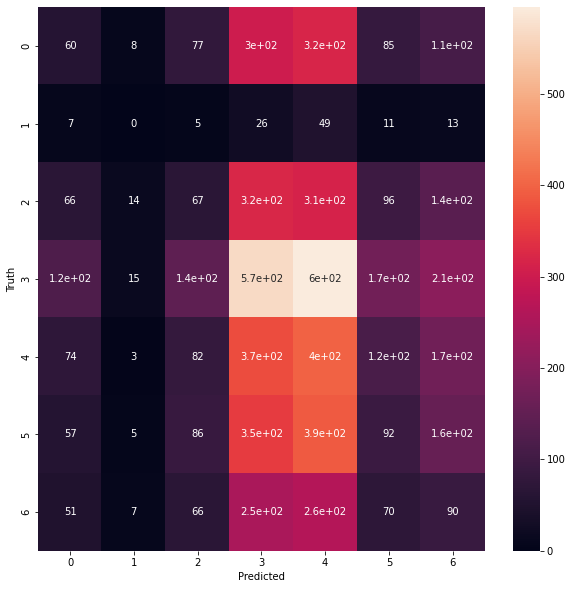

In [54]:
y_pred = model_tf.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
print(classification_report(validation_generator.classes,y_pred))

              precision    recall  f1-score   support

           0       0.14      0.06      0.09       960
           1       0.00      0.00      0.00       111
           2       0.13      0.07      0.09      1018
           3       0.26      0.31      0.28      1825
           4       0.17      0.33      0.22      1216
           5       0.14      0.08      0.10      1139
           6       0.10      0.11      0.11       797

    accuracy                           0.18      7066
   macro avg       0.13      0.14      0.13      7066
weighted avg       0.17      0.18      0.16      7066



1. CNN Architecture with Adam optimizers Accuracy: 41.80% 
2. CNN customized architecture with RMSProp Optimizers Accuracy: 31.47% 
3. Transfer Learning with Resnet50v2 pretrained model with Adam optimizer Accuracy: 45.47%

- The Transfer Learning with Resnet50v2 performs well as compared to  CNN architecture with Adam optimizer and CNN customized architecture with RMSProp optimizer.